In [1]:
import numpy as np
import matplotlib.pyplot as plt


#LEFT, RIGHT = -3, 3 это границы интервала
LEFT, RIGHT = -0.5, 0.5
# это переменные для ограничения области видимости, графика

Y_LIM_UP, Y_LIM_DOWN = 1, -0.25
EPS = 0.5
"""
Здесь идут функции к которым все строится
"""
def F2(x):
    return abs(x)

def multy(nodes, i, x=None):
    _res = 1.0
    for j in range(len(nodes)):
        if (i != j) and x is None:
            _res *= nodes[i] - nodes[j]
        elif (i != j):
            _res *= x - nodes[j]
    return _res

def Lougerange(x, nodes, my_func):
    _sum = 0
    for i in range(len(nodes)):
        _sum += (multy(nodes, i, x) * my_func(nodes[i]) / multy(nodes, i))
    return _sum

In [2]:
# """
# Делит узлы на еще м-частей по усл задачи
# """
# def modify_nodes(nodes, m):
#     modified_nodes = []
#     result = np.array([])
#     for i in range(len(nodes) - 1):
#         modified_nodes.append(np.linspace(nodes[i], nodes[i + 1], m + 1))
#     # print(modified_nodes)
#     return np.unique(np.concatenate(tuple(modified_nodes)))

def use_func_to_arr(my_func, _arr):
    return list(map(lambda x: my_func(x), _arr))

def draw(n, m, my_func, _fsize=(20, 9)):
    fig, ax = plt.subplots(figsize=_fsize)

    _nodes = np.linspace(LEFT, RIGHT, n + 1)
    _laug_nodes = np.linspace(LEFT, RIGHT, 2 * n + 1)

    _mod_nodes =  np.linspace(LEFT, RIGHT, n * m + 1)
    _mod_laug_nodes = np.linspace(LEFT, RIGHT, 2 * n * m + 1)
    
    ax.plot(_mod_nodes, list(map(lambda x: Lougerange(x, _mod_laug_nodes, my_func), _mod_nodes)),
                         linewidth=3, 
                         label='интерполяция',
                        color='b')
              
    ax.plot(_mod_nodes, use_func_to_arr(my_func, _mod_nodes), '--', color='r', label='функция', linewidth=3)
    ax.plot(_mod_nodes, list(map(lambda x: Lougerange(x, _mod_laug_nodes, my_func), _mod_nodes)),
                        'ro',
                            color='g')              
    # print(f"NODES {_nodes} \n use {use_func_to_arr(my_func, _nodes)}")
    ax.set_xlabel('x label') 
    ax.set_ylabel('y label')
    plt.grid()
    plt.legend()
    plt.show()


C:\Users\BOGDAN\AppData\Local\Temp/ipykernel_5904/4041124849.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(_mod_nodes, list(map(lambda x: Lougerange(x, _mod_laug_nodes, my_func), _mod_nodes)),


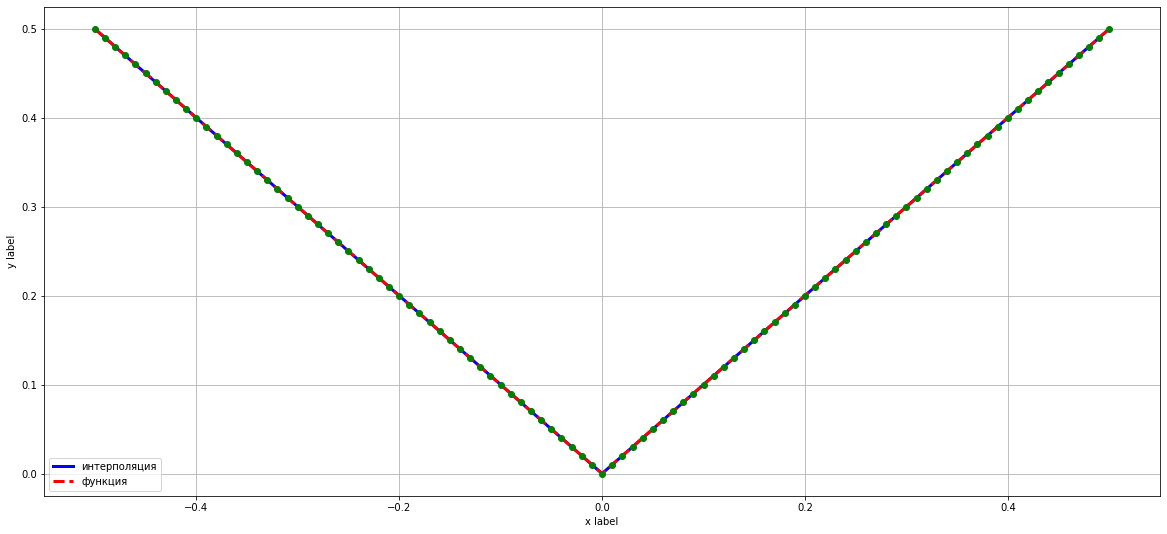

In [3]:
def main():
    n = int(input())
    m = 10
    draw(n, m, F2)
    # print(n, m)

main()